Feature Scaling - 01
Standardisation


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("house_prices.csv")
df

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187526,187526,3 BHK Ready to Occupy Flat for sale in Bollywo...,This magnificent 3 BHK Flat is available for s...,63 Lac,3225.0,zirakpur,NaN,Ready to Move,2 out of 4,New Property,...,East,Garden/Park,Bollywood Esencia,3,3,1 Covered,Freehold,1953 sqft,NaN,NaN
187527,187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,Have a look at this immaculate 3 BHK flat for ...,55 Lac,3274.0,zirakpur,NaN,Ready to Move,4 out of 6,Resale,...,North - East,"Garden/Park, Main Road",Sushma Urban Views,3,NaN,1 Covered,NaN,1680 sqft,NaN,NaN
187528,187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,"Gazipur, Zirakpur has an appealing 3 BHK flat ...",76 Lac,4343.0,zirakpur,1250 sqft,Ready to Move,1 out of 3,Resale,...,East,"Garden/Park, Main Road",Bollywood Esencia,3,2,"1 Covered,",Freehold,NaN,NaN,NaN
187529,187529,2 BHK Ready to Occupy Flat for sale in Friends...,Up for immediate sale is a 2 BHK apartment in ...,30 Lac,4231.0,zirakpur,NaN,Ready to Move,2 out of 2,Resale,...,NaN,Main Road,Friends Enclave,2,NaN,NaN,NaN,709 sqft,NaN,NaN


In [4]:
dataset = df.loc[:,['Price (in rupees)','Bathroom']]
dataset

,Price (in rupees),Bathroom
0,6000.0,1
1,13799.0,2
2,17500.0,2
3,NaN,1
4,18824.0,2
...,...,...
187526,3225.0,3
187527,3274.0,3
187528,4343.0,3
187529,4231.0,2


Removing the NaN value columns


In [5]:
df_cleaned = dataset[~dataset['Price (in rupees)'].isin(['NaN', None])].dropna(subset=['Price (in rupees)'])
df_cleaned

,Price (in rupees),Bathroom
0,6000.0,1
1,13799.0,2
2,17500.0,2
4,18824.0,2
5,6618.0,1
...,...,...
187526,3225.0,3
187527,3274.0,3
187528,4343.0,3
187529,4231.0,2


Train_Test_Split


In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_cleaned.drop('Price (in rupees)',axis=1),df_cleaned['Price (in rupees)'],test_size=0.3)

In [7]:
x_test

,Bathroom
118545,1
106479,2
184483,2
159978,1
142201,1
...,...
82185,2
64856,2
103506,2
161274,2


In [8]:
x_train

,Bathroom
54526,3
82357,3
114519,2
124642,3
152451,2
...,...
141916,3
15539,2
96579,2
10098,2


MinMaxScaler


In [9]:
x_train_converted = x_train.apply(pd.to_numeric, errors='coerce')
x_test_converted = x_test.apply(pd.to_numeric, errors='coerce')

In [10]:
x_train_converted

,Bathroom
54526,3.0
82357,3.0
114519,2.0
124642,3.0
152451,2.0
...,...
141916,3.0
15539,2.0
96579,2.0
10098,2.0


In [11]:
scaler = MinMaxScaler()

scaler.fit(x_train_converted)

x_train_scaled = scaler.transform(x_train_converted)
x_test_scaled = scaler.transform(x_test_converted)

In [12]:
x_train_scaled

array([[0.22222222],
       [0.22222222],
       [0.11111111],
       ...,
       [0.11111111],
       [0.11111111],
       [0.11111111]], shape=(118906, 1))

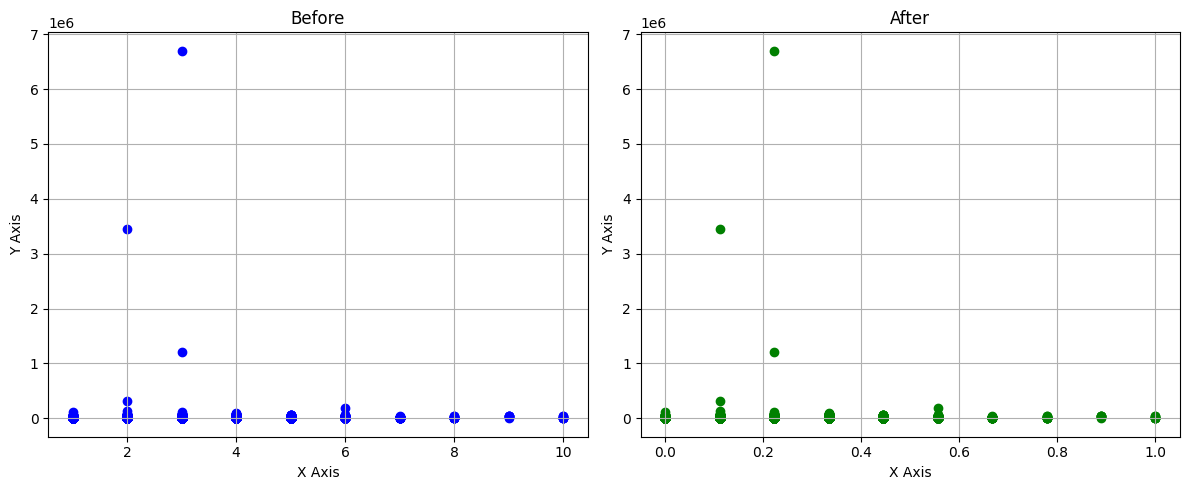

In [13]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Dot graph (scatter plot) for BEFORE
axes[0].scatter(x_train_converted, y_train, color='blue')
axes[0].set_title('Before')
axes[0].set_xlabel('X Axis')
axes[0].set_ylabel('Y Axis')

# Dot graph (scatter plot) for AFTER
axes[1].scatter(x_train_scaled, y_train, color='green')
axes[1].set_title('After')
axes[1].set_xlabel('X Axis')
axes[1].set_ylabel('Y Axis')

axes[0].grid(True)
axes[1].grid(True)

plt.tight_layout()
plt.show()



In [14]:
x_combined = pd.concat([x_train_converted, x_test_converted], axis=0)
x_combined

,Bathroom
54526,3.0
82357,3.0
114519,2.0
124642,3.0
152451,2.0
...,...
82185,2.0
64856,2.0
103506,2.0
161274,2.0


In [15]:
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)

x_combined_scaled = pd.concat([x_train_scaled_df, x_test_scaled_df], axis=0).reset_index(drop=True)

x_combined_scaled

,Bathroom
0,0.222222
1,0.222222
2,0.111111
3,0.222222
4,0.111111
...,...
169861,0.111111
169862,0.111111
169863,0.111111
169864,0.111111
